In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
dfTrain = pd.read_csv("dataStuff/trainTitanic.csv")
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
dfTrain = dfTrain.drop(['Name'], axis = 1)
dfTrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
for i in dfTrain.columns:
    dfTrain[i] = dfTrain[i].fillna(dfTrain[i].mode()[0])
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
objectDict = {}
for i in dfTrain.columns:
    if dfTrain[i].dtype == 'object':
        objectDict[i] = pd.Series(np.unique(dfTrain[i]))
objectDict

{'Sex': 0    female
 1      male
 dtype: object,
 'Ticket': 0           110152
 1           110413
 2           110465
 3           110564
 4           110813
           ...     
 676     W./C. 6608
 677     W./C. 6609
 678    W.E.P. 5734
 679      W/C 14208
 680      WE/P 5735
 Length: 681, dtype: object,
 'Cabin': 0      A10
 1      A14
 2      A16
 3      A19
 4      A20
       ... 
 142    F33
 143    F38
 144     F4
 145     G6
 146      T
 Length: 147, dtype: object,
 'Embarked': 0    C
 1    Q
 2    S
 dtype: object}

In [19]:
for i in objectDict.keys():
    for j in list(objectDict[i].index):
        dfTrain[i] = dfTrain[i].replace(objectDict[i][j], j)
dfTrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,47,2
887,888,1,1,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,0,24.0,1,2,675,23.4500,47,2
889,890,1,1,1,26.0,0,0,8,30.0000,60,0


Text(0.5, 1.0, '\nCorrelation Matrix\n')

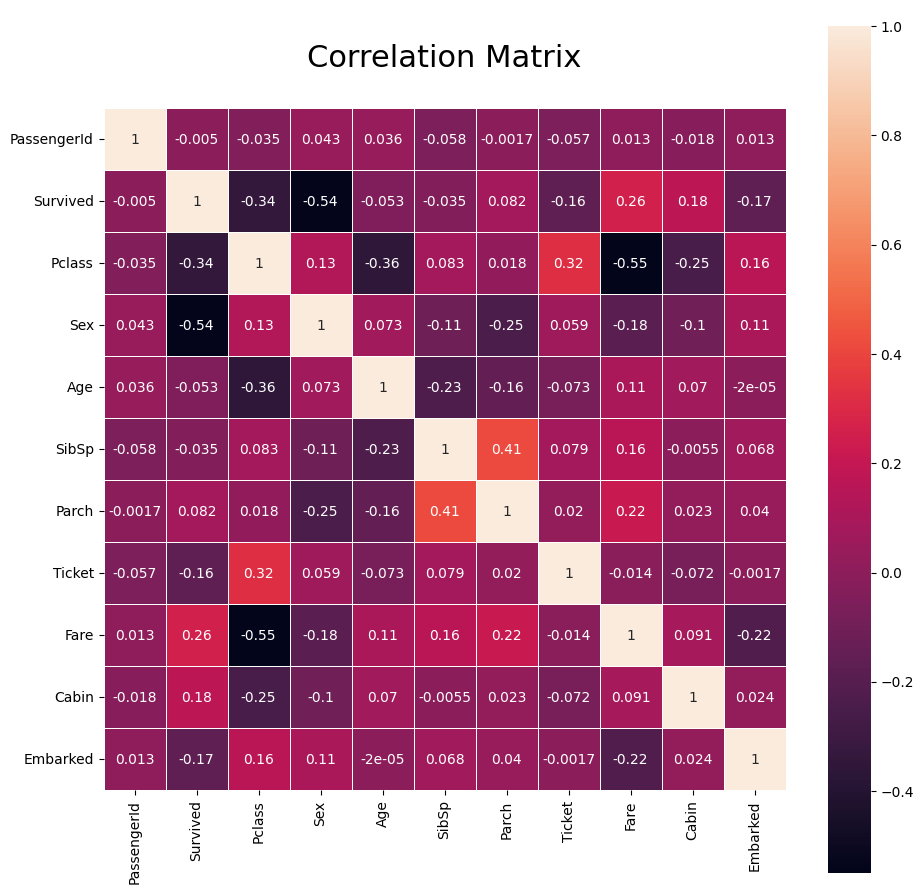

In [20]:
plt.figure(figsize=(dfTrain.corr().shape))
sns.heatmap(dfTrain.corr(), annot=True, linewidths=.5, square = True)
plt.title("\nCorrelation Matrix\n", size = 22)